
 KNN Accuracy: 0.9366

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       102
           1       0.92      0.95      0.94       103

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205

Confusion Matrix:
 [[94  8]
 [ 5 98]]


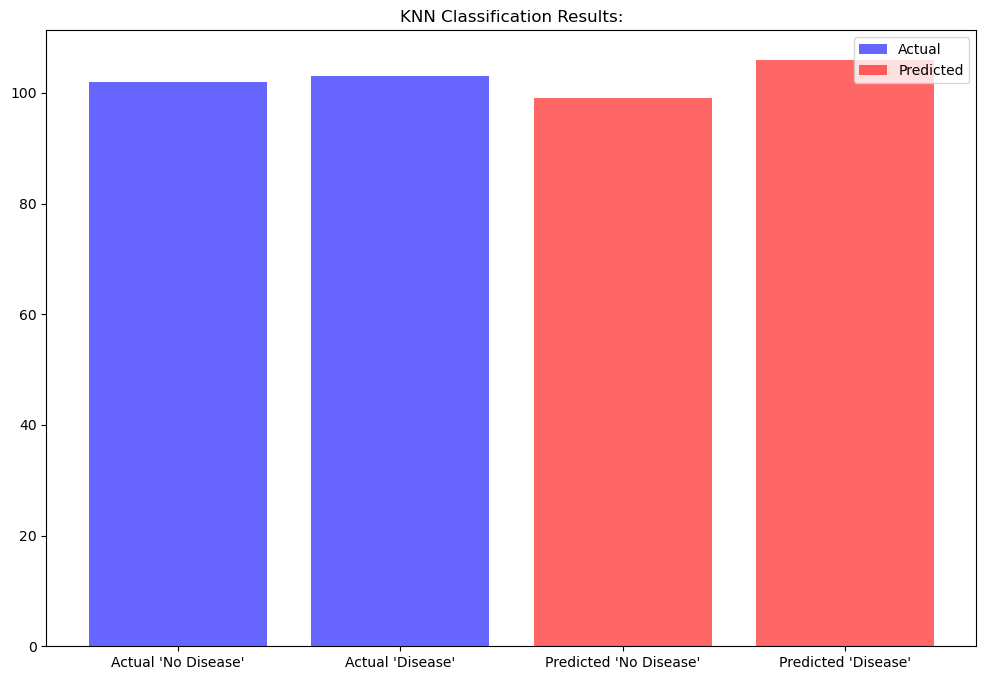

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
                                                      
df = pd.read_excel('heartds.xlsx')
df['target'] = df['target'].map({'Not Disease': 0, 'Disease': 1})
df = df.dropna()
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n KNN Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(12,8))
plt.bar(["Actual 'No Disease'", "Actual 'Disease'"], np.bincount(y_test), color='blue', alpha=0.6, label="Actual")
plt.bar(["Predicted 'No Disease'", "Predicted 'Disease'"], np.bincount(y_pred), color='red', alpha=0.6, label="Predicted")
plt.title("KNN Classification Results:")
plt.legend()
plt.show()


In [1]:
!pip install -q scikit-learn pandas numpy

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error

df = pd.read_csv("Diabetes_Missing_Data.csv")

X = df.drop(columns=["Class"])
y = df["Class"].replace({"no": 0, "yes": 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print("Data (Before Imputation):")
print(X_train.head())

X_train_drop = X_train.dropna().reset_index(drop=True)
y_train_drop = y_train.loc[X_train_drop.index].reset_index(drop=True)
X_test_drop = X_test.dropna().reset_index(drop=True)
y_test_drop = y_test.loc[X_test_drop.index].reset_index(drop=True)
clf_drop = RandomForestClassifier(random_state=42)
clf_drop.fit(X_train_drop, y_train_drop)
y_pred_drop = clf_drop.predict(X_test_drop)

knn_imputer = KNNImputer(n_neighbors=5)
X_train_knn = pd.DataFrame(knn_imputer.fit_transform(X_train), columns=X_train.columns)
X_test_knn = pd.DataFrame(knn_imputer.transform(X_test), columns=X_test.columns)

print("\nData (After KNN Imputation)")
print(X_train_knn.head())

clf_knn = RandomForestClassifier(random_state=42)
clf_knn.fit(X_train_knn, y_train)
y_pred_knn = clf_knn.predict(X_test_knn)

mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print(f"MSE: {mse_knn:.4f}")
print(f"MAE: {mae_knn:.4f}")


Data (Before Imputation):
   Pregnant  Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin   BMI  \
0         2     84.0           NaN        NaN            NaN   NaN   
1         9    112.0          82.0       24.0            NaN  28.2   
2         1    139.0          46.0       19.0           83.0  28.7   
3         0    161.0          50.0        NaN            NaN  21.9   
4         6    134.0          80.0       37.0          370.0  46.2   

   Diabetes_Pedigree  Age  
0              0.304   21  
1              1.282   50  
2              0.654   22  
3              0.254   65  
4              0.238   46  

Data (After KNN Imputation)
   Pregnant  Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin   BMI  \
0       2.0     84.0          61.2       24.2           62.0  29.4   
1       9.0    112.0          82.0       24.0          212.4  28.2   
2       1.0    139.0          46.0       19.0           83.0  28.7   
3       0.0    161.0          50.0       25.4          232.0  21.9   
4     